In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False    
import seaborn as sns
sns.set_palette('magma')#调色

## 1.导入数据&可视化探索

In [2]:
# 读取数据
data=pd.read_excel('../data/Problem_C_Data_Wordle.xlsx')
data.head()

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
0,2022-12-31,560,manly,20380,1899,0,2,17,37,29,12,2
1,2022-12-30,559,molar,21204,1973,0,4,21,38,26,9,1
2,2022-12-29,558,havoc,20001,1919,0,2,16,38,30,12,2
3,2022-12-28,557,impel,20160,1937,0,3,21,40,25,9,1
4,2022-12-27,556,condo,20879,2012,0,2,17,35,29,14,3


In [3]:
# 获取属性信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         359 non-null    datetime64[ns]
 1   Contest number               359 non-null    int64         
 2   Word                         359 non-null    object        
 3   Number of  reported results  359 non-null    int64         
 4   Number in hard mode          359 non-null    int64         
 5   1 try                        359 non-null    int64         
 6   2 tries                      359 non-null    int64         
 7   3 tries                      359 non-null    int64         
 8   4 tries                      359 non-null    int64         
 9   5 tries                      359 non-null    int64         
 10  6 tries                      359 non-null    int64         
 11  7 or more tries (X)          359 non-null    

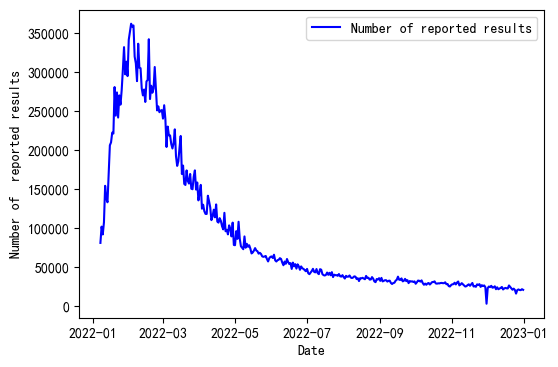

In [4]:
# 数据可视化—— 报告人数
plt.figure(figsize=(6,4))

# Line chart showing the number of visitors to Avila Adobe over time
sns.lineplot(x='Date',y='Number of  reported results',data = data,color = 'blue')

# Add label for horizontal axis & legend
plt.legend(['Number of reported results'])
plt.xlabel("Date")
#plt.savefig('../latex/pic/Number of reported results line plot.png')

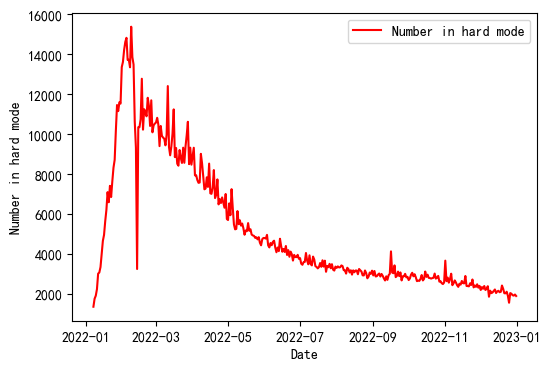

In [5]:
# 数据可视化—— 困难模式人数
plt.figure(figsize=(6,4))

# Line chart showing the number of visitors to Avila Adobe over time
sns.lineplot(x='Date',y='Number in hard mode',data = data, color='red')

# Add label for horizontal axis & legend
plt.legend(['Number in hard mode'])
plt.xlabel("Date")
#plt.savefig('../latex/pic/Number in hard mode line plot.png')

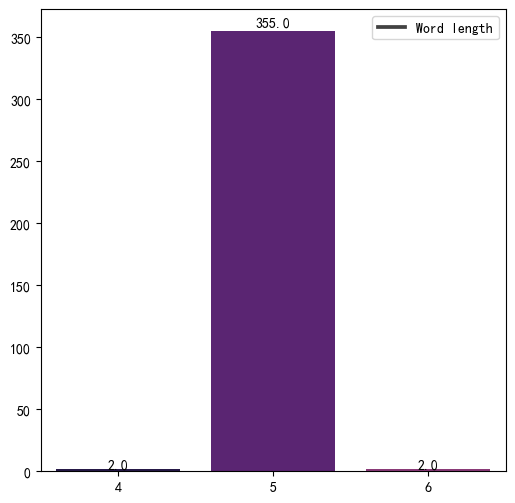

In [6]:
#长度特征提取——可视化
data['len']=data['Word'].apply(lambda x:len(x))
nums_category = np.unique(data['len'])
nums_list = []
for i in nums_category:
    nums_list.append(len(data[data['len']==i]))

#标签显示函数

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)
#绘图
plt.figure(figsize=(6,6))
a = sns.barplot(x = nums_category , y = nums_list)
show_values(a)
plt.legend(['Word length'])

<AxesSubplot:>

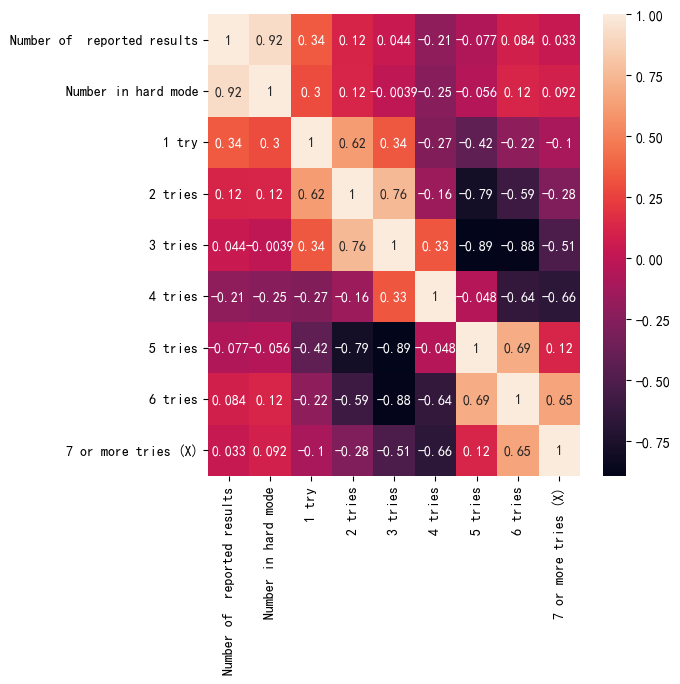

In [7]:
#相关热力图
plt.figure(figsize=(6,6))
sns.heatmap(data=data[['Number of  reported results','Number in hard mode','1 try','2 tries','3 tries','4 tries','5 tries',
'6 tries','7 or more tries (X)']].corr(), annot=True)
#plt.savefig('相关系数可视化.png')

## 2.数据预处理

In [8]:
#将数据倒序处理
data = data.sort_values(by='Contest number', ignore_index=True)

# 对tries进行归一化，使其结果和等于100
percent = data[data.columns[5:12]].sum(axis=1)
for column in data.columns[5:12]:
    data[column]=data[column]/percent*100

data

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),len
0,2022-01-07,202,slump,80630,1362,1.000000,3.000000,23.000000,39.000000,24.000000,9.000000,1.000000,5
1,2022-01-08,203,crank,101503,1763,1.000000,5.000000,23.000000,31.000000,24.000000,14.000000,2.000000,5
2,2022-01-09,204,gorge,91477,1913,1.000000,3.000000,13.000000,27.000000,30.000000,22.000000,4.000000,5
3,2022-01-10,205,query,107134,2242,1.000000,4.000000,16.000000,30.000000,30.000000,17.000000,2.000000,5
4,2022-01-11,206,drink,153880,3017,0.990099,8.910891,34.653465,33.663366,15.841584,4.950495,0.990099,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-12-27,556,condo,20879,2012,0.000000,2.000000,17.000000,35.000000,29.000000,14.000000,3.000000,5
355,2022-12-28,557,impel,20160,1937,0.000000,3.030303,21.212121,40.404040,25.252525,9.090909,1.010101,5
356,2022-12-29,558,havoc,20001,1919,0.000000,2.000000,16.000000,38.000000,30.000000,12.000000,2.000000,5
357,2022-12-30,559,molar,21204,1973,0.000000,4.040404,21.212121,38.383838,26.262626,9.090909,1.010101,5


In [9]:
#对报告人数时序异常值进行平滑
data.loc[data['Contest number'] == 529 ,'Number of  reported results'] = \
(float(data.loc[data['Contest number'] == 528 ,'Number of  reported results']) + \
float(data.loc[data['Contest number'] == 530 ,'Number of  reported results']))/2

#对hardmode人数异常值进行平滑
data.loc[data['Contest number'] == 239 ,'Number in hard mode'] = \
(float(data.loc[data['Contest number'] == 238 ,'Number in hard mode']) + \
float(data.loc[data['Contest number'] == 240 ,'Number in hard mode']))/2

print('修改过后的值1为：',data.loc[data['Contest number'] == 529 ,'Number of  reported results'])
print('修改过后的值2为：',data.loc[data['Contest number'] == 239 ,'Number in hard mode'])

修改过后的值1为： 327    23183.5
Name: Number of  reported results, dtype: float64
修改过后的值2为： 37    9826.5
Name: Number in hard mode, dtype: float64


In [10]:
#单词长度异常值处理——4
data.loc[data['len'] == 4 ,'Word']

112    tash
323    clen
Name: Word, dtype: object

In [11]:
#寻找相近单词填充
data.loc[323,'Word'] = 'clean'
data.loc[112,'Word'] = 'trash'

In [12]:
#单词长度异常值处理——6
data.loc[data['len'] == 6 ,'Word']

5      favor 
343    rprobe
Name: Word, dtype: object

In [13]:
#寻找相近单词填充
data.loc[5,'Word'] = 'favor'
data.loc[343,'Word'] = 'probe'

In [14]:
#验证是否清洗完成
data['len']=data['Word'].apply(lambda x:len(x))
nums_category = np.unique(data['len'])
print(nums_category)

[5]


In [15]:
#将清洗后数据保存
data.drop('len',axis = 1,inplace= True)
data.to_excel('../data/清洗数据.xlsx',index = False)